**I. Project objective**

In this project, the objective is to perform unsupervised clustering on customer data obtained from a groceries firm's database. The goal of customer segmentation is to form clusters based on similarities, facilitating the creation of distinct groups that maximize their relevance to the business. Through this segmentation, tailored products can be designed to meet the unique needs and behaviors of each customer group. This approach empowers the business to effectively address the diverse concerns and preferences of different customer types, enhancing overall customer satisfaction and engagement.

**II. About the dataset**

Attributes
1. People

* ID: Customer’s unique identifier
* Year_Birth: Customer’s birth year
* Education: Customer’s education level
* Marital_Status: Customer’s marital status
* Income: Customer’s yearly household income
* Kidhome: Number of children in customer’s household
* Teenhome: Number of teenagers in customer’s household
* Dt_Customer: Date of customer’s enrollment with the company
* Recency: Number of days since customer’s last purchase
* Year_Birth: Customer’s birth year
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise
* Country: Customer's living country

2. Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years
3. Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
4. Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

5. Target

* Need to perform clustering to summarize customer segments.


**III. Importing libraries**

In [2]:
!pip install kmodes

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import LabelEncoder, PowerTransformer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import davies_bouldin_score

from kmodes.kprototypes import KPrototypes
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch

import sys
import warnings
warnings.filterwarnings("ignore")

**IV. Importing data**

In [4]:
data = pd.read_csv("/content/marketing_data.csv")

In [ ]:
data.shape

(2240, 28)

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,06/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,06/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,05/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,05/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,04/08/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


**V. Data cleaning**

In this segment, I’ll cover two key aspects:

* Dealing with missing values.
* Feature Engineering.
* Dealing with outliers.

These steps are essential for understanding the necessary actions to tidy up the dataset comprehensively.
To gain a complete understanding of the dataset and the steps required for its cleansing, let’s delve into the
data information.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The above output reveals several important points :

* There are missing values within the ‘income’ column.
* The ‘Dt_Customer’ column, representing the customer joining date, isn’t formatted as a DateTime
data type.
* Our dataset contains categorical features denoted by ‘object’ data types, requiring encoding into numerical
formats at a later stage.

**1. Dealing with missing values**

Given the scarcity of missing values, we’ll proceed by simply dropping these rows. This action is not anticipated to significantly impact the overall dataset.

In [5]:
data.dropna(inplace=True)

In [ ]:
data.shape

(2216, 28)

The number of observations after dropping rows with missing values is: 2216

**2. Feature engineering**

In the upcoming phase, I’ll generate a new feature using the ‘**Dt_Customer**’ column to signify the duration each customer has been registered in the firm’s database. To simplify this process, I’ll calculate this duration
relative to the most recent customer in the dataset. Therefore, I need to identify both the oldest and newest recorded dates to derive these values.
I’ll create a new feature named ‘**Customer_For**,’ denoting the duration in days since each customer commenced shopping at the store, relative to the most recent recorded date in our records.

In [6]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
newest_date = data['Dt_Customer'].max()
oldest_date = data['Dt_Customer'].min()
data['Customer_For'] = (newest_date - data['Dt_Customer']).dt.days
print("Newest Date:", newest_date)
print("Oldest Date:", oldest_date)

Newest Date: 2014-06-29 00:00:00
Oldest Date: 2012-07-30 00:00:00


To get a clear understanding of the categorical features, mainly **Marital_Status** and **Education**, we will explore their unique values

In [7]:
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")
print(data[['Dt_Customer', 'Customer_For']].head())

  Dt_Customer  Customer_For
0  2014-06-16            13
1  2014-06-15            14
2  2014-05-13            47
3  2014-05-11            49
4  2014-04-08            82


In [8]:
print("Categories in Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")

Categories in Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64 



In [9]:
print("Categories in Education:\n", data["Education"].value_counts())

Categories in Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In the upcoming phase, I’ll be implementing the following steps to engineer new features:
* Deriving the ‘**Age**’ of each customer using the ’**Year_Birth**,’ signifying their birth year.
* Introducing a new feature named ‘**Spending**’ indicating the total expenditure made by customers
across various categories over a two-year span.
* Creating the ‘**Living_With**’ feature based on ‘**Marital_Status**’ to extract information about couples’
living arrangements.
* Constructing a ‘**Children**’ feature to represent the total number of children, encompassing kids and
teenagers, within a household.
* To gain a deeper understanding of households, generating a ‘**Family_Size**’ feature.
* Establishing an ‘**Is_Parent**’ feature to denote the parenthood status of customers.
* Simplifying the ‘**Education**’ feature into three categories by consolidating its value counts.
* Finally, eliminating redundant features from the dataset.

In [10]:
#Age was calculated based on the last purchase date (2014)
data['Age'] = 2014 - data['Year_Birth']
data['Spending'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts']+ data['MntGoldProds']
data["Living_With"] = data["Marital_Status"].replace({
    "Married": "Partner",
    "Together": "Partner",
    "Single": "Alone",
    "Divorced": "Alone",
    "Widow": "Alone",
    "Alone": "Alone",
    "Absurd": "Other",
    "YOLO": "Other",
    # Add more replacements as needed
})
data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2, "Other":1})+data['Children']
data["Is_Parent"] = np.where(data.Children > 0, 1, 0)
data["Education"] = data["Education"].replace(
    {"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "PhD":"Post Graduated", "Master": "Post Graduated"})

print(data[['Spending', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education']].head())

   Spending  Age  Children  Family_Size  Is_Parent Education
0      1190   44         0            1          0  Graduate
1       577   53         0            1          0  Graduate
2       251   56         1            3          1  Graduate
3        11   47         2            4          1  Graduate
4        91   25         1            2          1  Graduate


In [12]:
data["Family_Size"].value_counts()

3    880
2    757
4    296
1    252
5     31
Name: Family_Size, dtype: int64

In [11]:
#Changing colnames to make them easier to deal with
data = data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweet","MntGoldProds":"Gold"})
#Dropping some of the redundant features
dropped = ["Marital_Status", "Dt_Customer", "Year_Birth", "ID"]
data = data.drop(dropped, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweet                2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

**3. Dealing with outliers**

In [12]:
data.describe().loc[['count', 'mean', 'std', 'max', 'min']].T

,count,mean,std,max,min
Income,2216.0,52247.251354,25173.076661,666666.0,1730.0
Kidhome,2216.0,0.441787,0.536896,2.0,0.0
Teenhome,2216.0,0.505415,0.544181,2.0,0.0
Recency,2216.0,49.012635,28.948352,99.0,0.0
Wines,2216.0,305.091606,337.327920,1493.0,0.0
Fruits,2216.0,26.356047,39.793917,199.0,0.0
Meat,2216.0,166.995939,224.283273,1725.0,0.0
Fish,2216.0,37.637635,54.752082,259.0,0.0
Sweet,2216.0,27.028881,41.072046,262.0,0.0
Gold,2216.0,43.965253,51.815414,321.0,0.0


From the descriptive statistics, we can see that there are outliers in the ‘**Income**’ (666666) and ‘**Age**’ (121)
features.
The boxplot will help us detect potential outliers (Extreme values) in the two features.

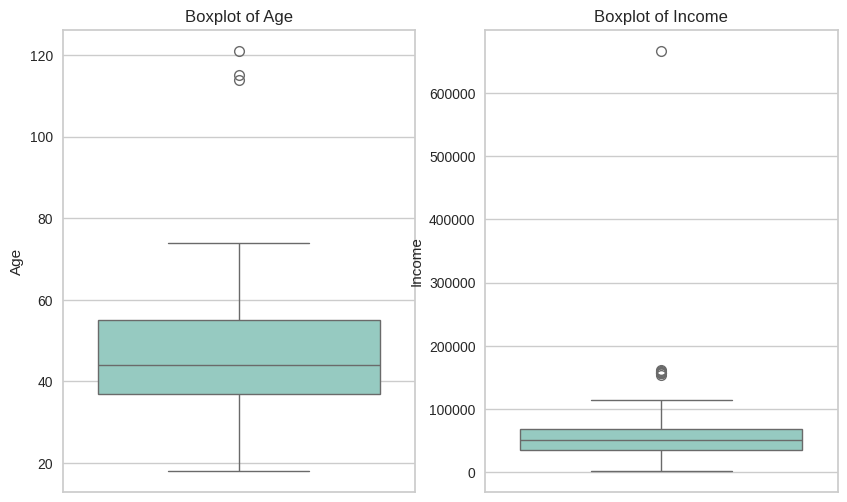

In [16]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, y='Age', palette='Set3')
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.subplot(1, 2, 2)
sns.boxplot(data=data, y='Income', palette='Set3')
plt.title('Boxplot of Income')
plt.ylabel('Income')
plt.show()

In [13]:
data = data[(data["Age"] < 90)]
data = data[(data["Income"] < 600000)]
print("Number of observations after removing the outliers is:", len(data))

Number of observations after removing the outliers is: 2212


**VI. A Brief Exploratory Data Analysis**

This section is devised into 2 main categories :
* Univariate analysis
* Bivariate analysis

**1. Univariate analysis**

This involves examining individual variables in a dataset to understand their distributions, patterns, and
central tendencies. The main variables we are going to explore are : Spending, Age, Education and Marital
Status.

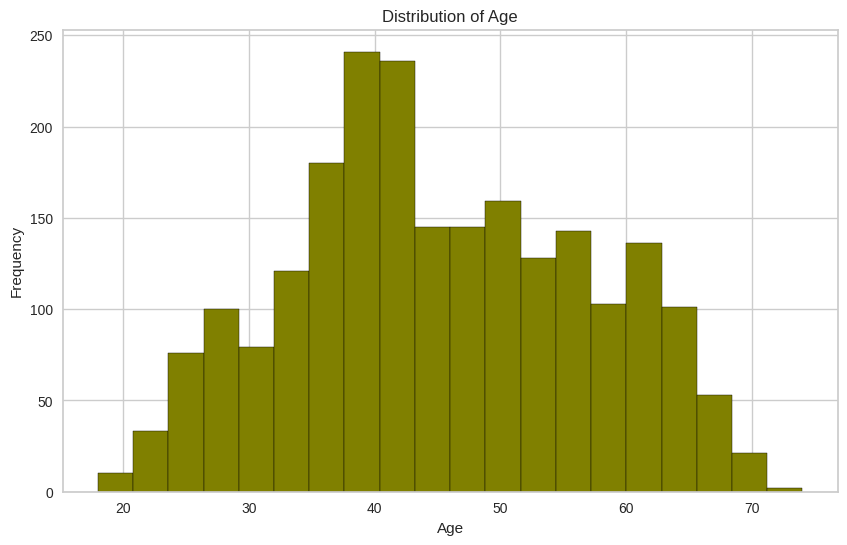

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(data["Age"], bins=20, color='olive', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

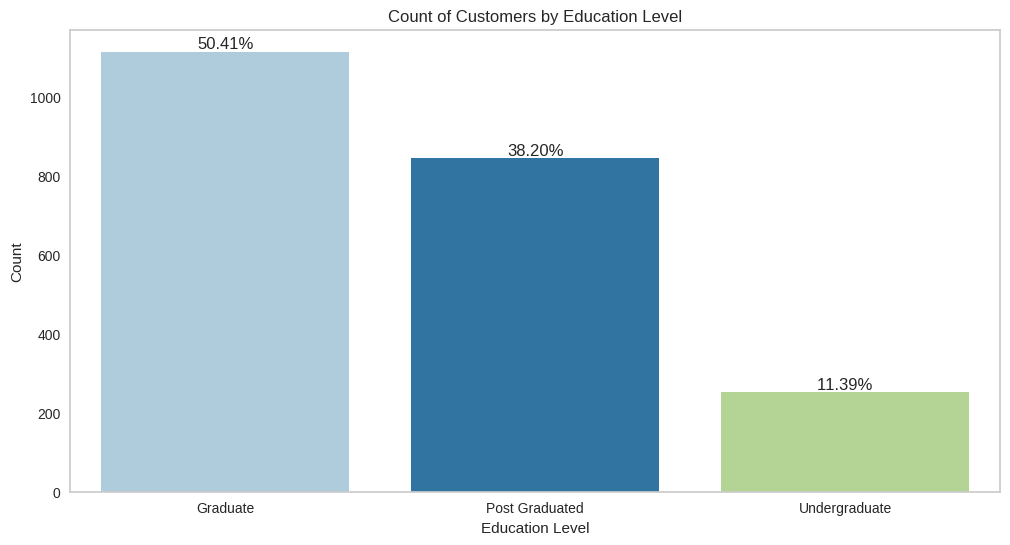

In [37]:
plt.figure(figsize=(12, 6))
total = float(len(data['Education']))
ax = sns.countplot(data=data, x='Education', palette='Paired')
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 0.3, '{:.2f}%'.format((height/total) * 100),
  ha='center', va='bottom')
plt.title('Count of Customers by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

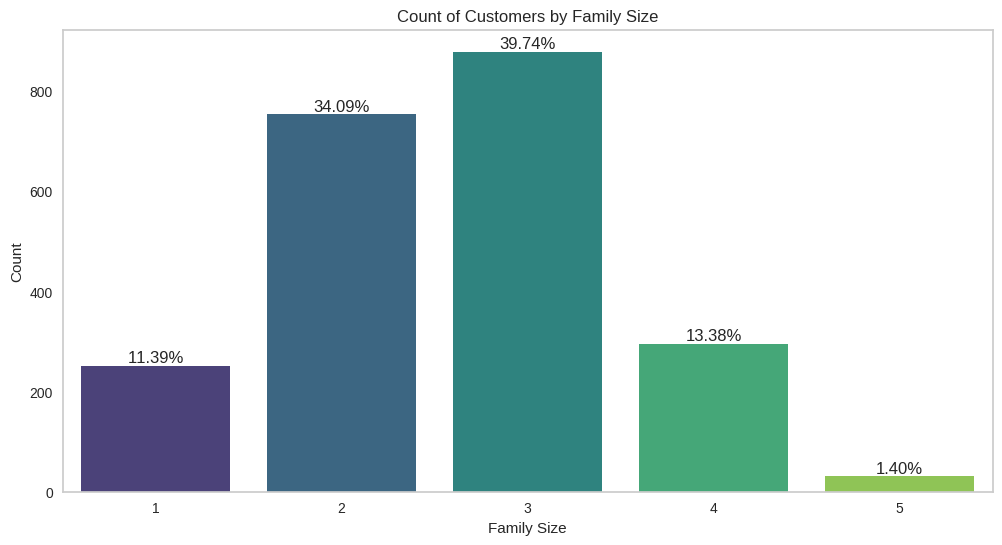

In [21]:
plt.figure(figsize=(12, 6))
total = float(len(data['Family_Size']))
ax = sns.countplot(data=data, x='Family_Size', palette='viridis')
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 0.3, '{:.2f}%'.format((height/total) * 100),
  ha='center', va='bottom')
plt.title('Count of Customers by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

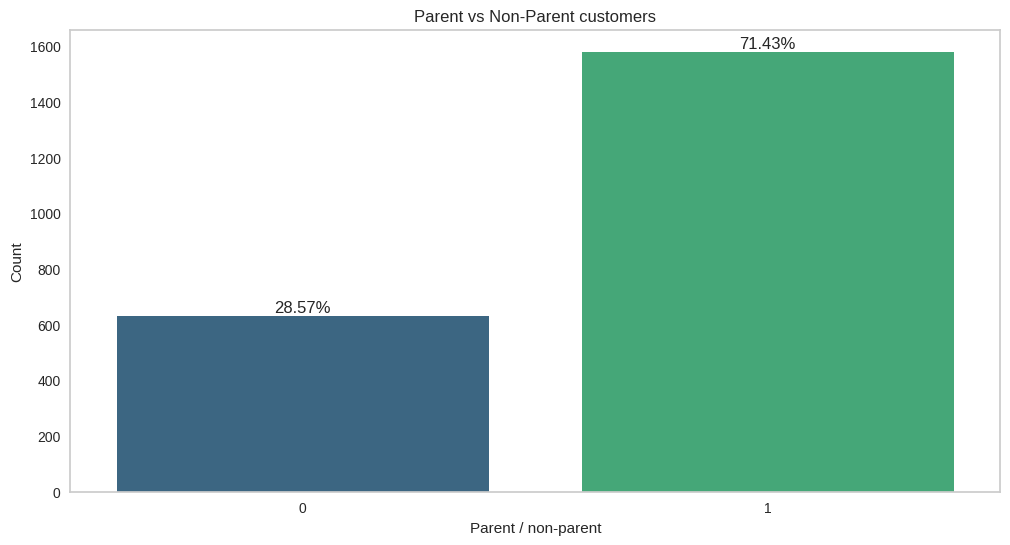

In [23]:
plt.figure(figsize=(12, 6))
total = float(len(data['Is_Parent']))
ax = sns.countplot(data=data, x='Is_Parent', palette='viridis')
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 0.3, '{:.2f}%'.format((height/total) * 100),
  ha='center', va='bottom')
plt.title('Parent vs Non-Parent customers')
plt.xlabel('Parent / non-parent')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

**2. Bivariate analysis**

This involves exploring the relationship between two variables in a dataset. It helps in understanding correlations, dependencies, or associations between pairs of variables.

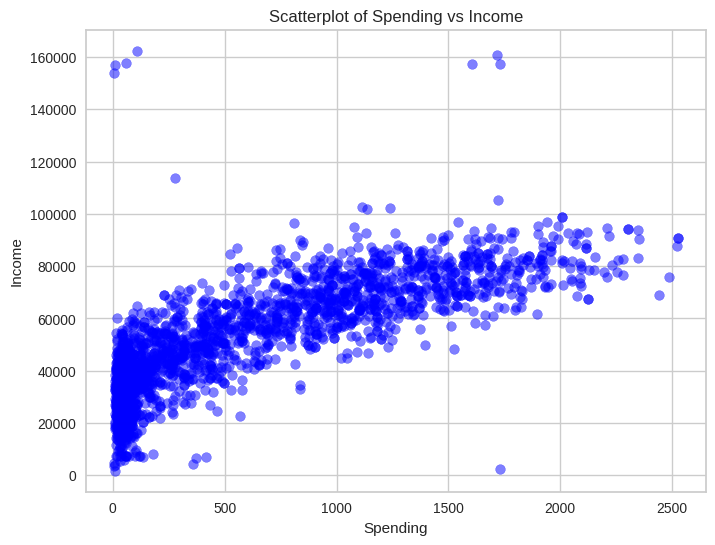

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Spending'], data['Income'], alpha=0.5, color='blue')
plt.title('Scatterplot of Spending vs Income')
plt.xlabel('Spending')
plt.ylabel('Income')
plt.grid(True)
plt.show()

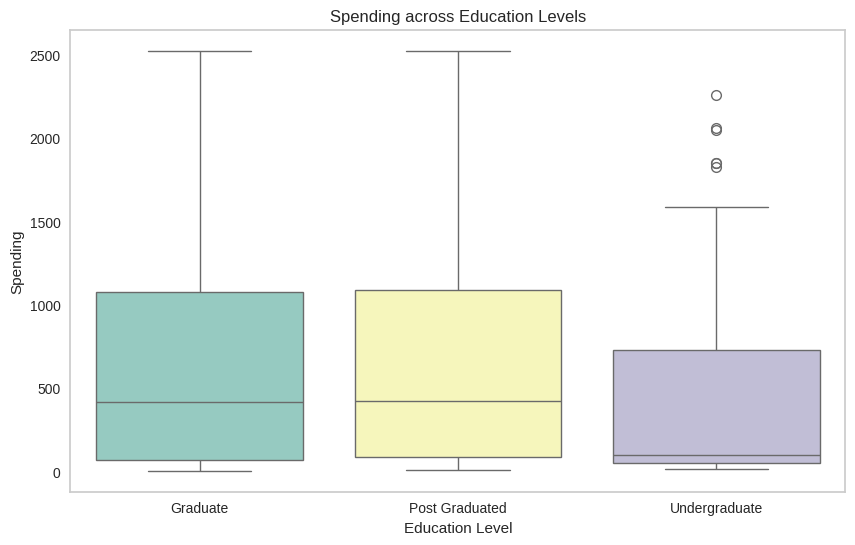

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Education', y='Spending', palette='Set3')
plt.title('Spending across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Spending')
plt.grid(axis='y')
plt.show()

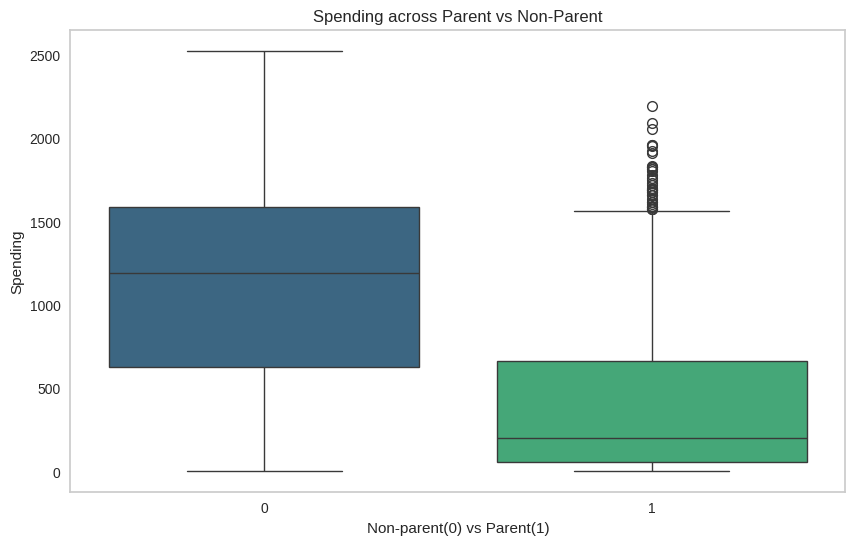

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Is_Parent', y='Spending', palette='viridis')
plt.title('Spending across Parent vs Non-Parent')
plt.xlabel('Non-parent(0) vs Parent(1)')
plt.ylabel('Spending')
plt.grid(axis='y')
plt.show()

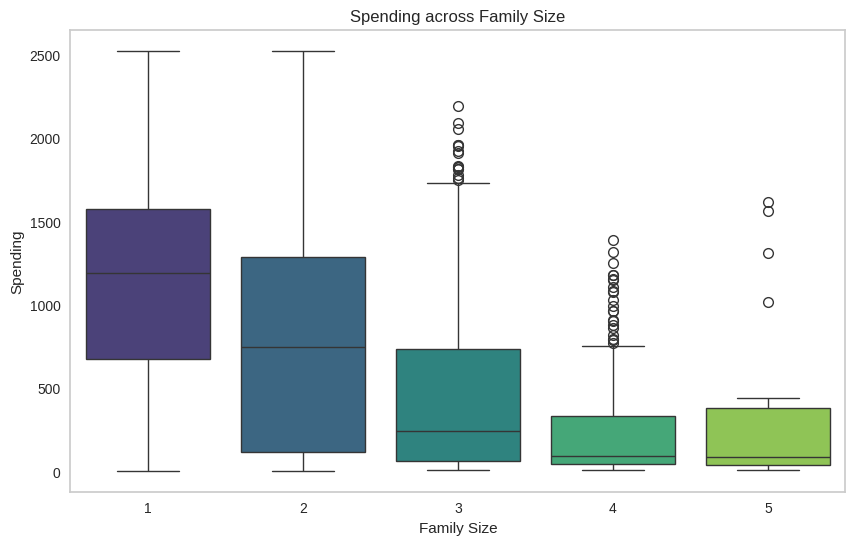

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Family_Size', y='Spending', palette='viridis')
plt.title('Spending across Family Size')
plt.xlabel('Family Size')
plt.ylabel('Spending')
plt.grid(axis='y')
plt.show()

**VII. Data Preprocessing**

In this stage, I’ll prepare the data for clustering operations through several preprocessing steps:

* Encoding categorical features using label encoding.
* Scaling the features utilizing the standard scaler method to ensure uniformity in their scales.
* Creating a subset dataframe to reduce dimensionality, focusing on specific features.

**1. Encoding categorical features**

In [43]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
# Iterate through each categorical column and encode it
for col in cat_cols:
  if col in data.columns:
    data[col] = label_encoder.fit_transform(data[col])

print("All features are now numerical")

All features are now numerical


**2. Scaling features**

In [44]:
#Make copy of "data" to "df"
df = data.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(cols_del, axis = 1)
#Scaling
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [54]:
scaled_data = pd.DataFrame(scaler.transform(df),columns= df.columns )
#scaled_data2 = pd.DataFrame(scaler2.transform(df2),columns= df2.columns )
print("All features are now scaled")

All features are now scaled


**VIII. Dimensionality Reduction**

In this scenario, clustering relies on multiple factors termed as attributes or features. Managing a high number of features can be challenging, especially when some are correlated and redundant. To address this, I’ll conduct dimensionality reduction on these selected features before initiating the clustering process.

Dimensionality reduction involves streamlining the number of considered variables, obtaining a concise set of essential variables while retaining most of the information.

Principal Component Analysis (PCA) serves as a method to achieve this reduction, aiming to improve interpretability while minimizing information loss. The steps in this phase encompass:

* Implementing PCA for dimensionality reduction.
* The number of dimensions will be determined by the retained variance, crucial for enhancing clustering
accuracy.
* Visualizing the reduced dataset through plots.

In [ ]:
pca = PCA(svd_solver='auto')
pca.fit(scaled_data)

In [56]:
print('Total no. of principal components =',pca.n_components_)

Total no. of principal components = 24


We’ll investigate the proportion of variance clarified by each principal component. These components will
be sorted in descending order based on their respective explained variance ratios. This exploration allows us
to understand how much information each principal component retains from the original dataset, aiding in
selecting the most informative components for further analysis.

**Explained Variance Ratios of PCs**

In [59]:
var = pca.explained_variance_ratio_
print(var)

[3.45101988e-01 1.21744617e-01 6.32539644e-02 5.49745299e-02
 4.61159673e-02 4.33239809e-02 4.03846807e-02 3.92318414e-02
 3.48662585e-02 3.18843711e-02 2.67515695e-02 2.51354064e-02
 2.30182081e-02 1.87122356e-02 1.76766882e-02 1.63132877e-02
 1.44251599e-02 1.15640536e-02 9.96134584e-03 8.31406995e-03
 7.23196614e-03 1.38092581e-05 8.13875295e-33 2.28206313e-33]


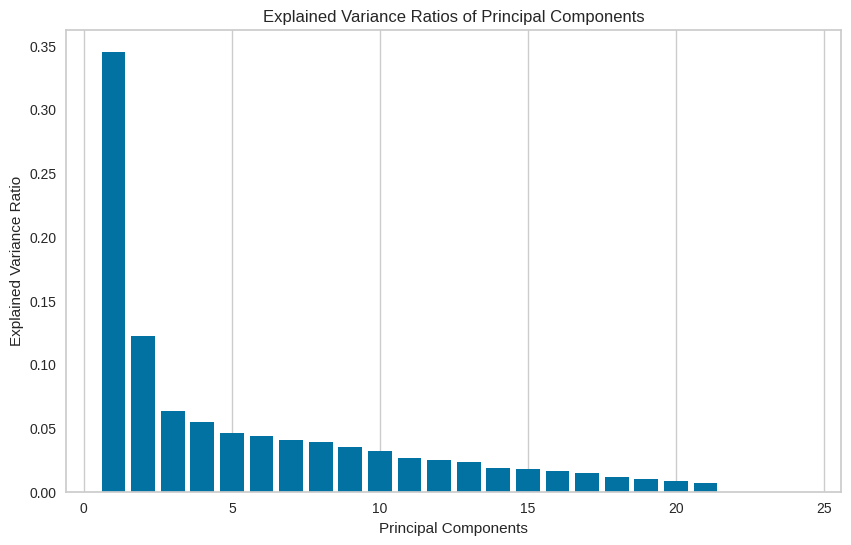

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(var) + 1), var)
plt.title('Explained Variance Ratios of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(axis='y')
plt.show()

The first principal component explains roughly 34% of the variance, while the second principal component
accounts for approximately 13%. By summing these, we can determine the cumulative variance explained
by these components. To simplify comprehension, we’re converting these values into percentages for easier
observation.

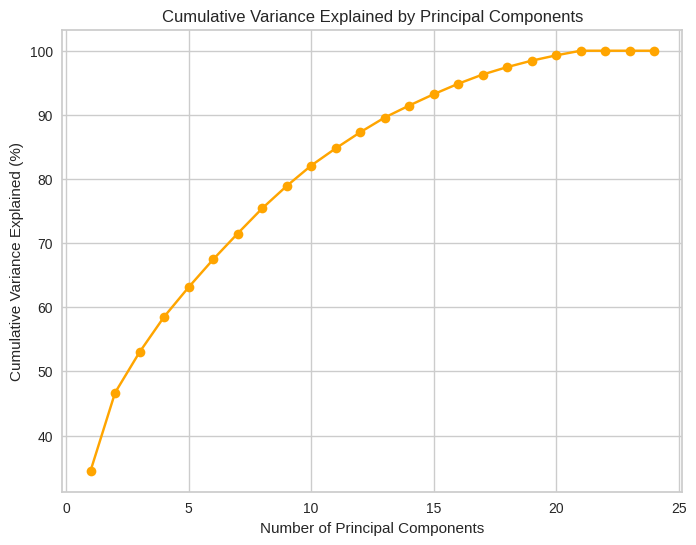

In [61]:
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o', linestyle='-', color='orange')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.grid(True)
plt.show()

The cumulative variance plot indicates the 90% threshold is getting crossed at PC = 13, which is quite
complicated in many aspects. For the sake of simplicity, we will retain PC = 3 and proceed to other
clustering algorithms.

In [119]:
pca = PCA(n_components=3)
pca_data=pca.fit_transform(scaled_data)

In [120]:
PCA_ds = pd.DataFrame(pca_data, columns=(["PC1","PC2", "PC3"]))
PCA_ds.describe()

,PC1,PC2,PC3
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,-5.781993e-17,-1.349132e-16,-7.869935e-17
std,2.878575e+00,1.709731e+00,1.231980e+00
min,-5.976750e+00,-4.213440e+00,-3.714327e+00
25%,-2.539889e+00,-1.322285e+00,-8.577721e-01
50%,-7.800905e-01,-1.784917e-01,-6.483328e-02
75%,2.387552e+00,1.236566e+00,8.709027e-01
max,7.453787e+00,6.151843e+00,6.973300e+00


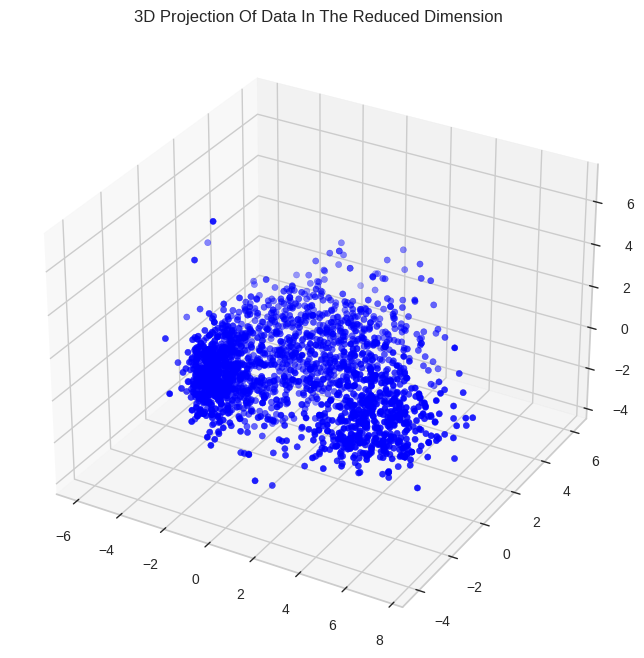

In [121]:
x =PCA_ds["PC1"]
y =PCA_ds["PC2"]
z =PCA_ds["PC3"]
#To plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("3D Projection Of Data In The Reduced Dimension")
plt.show()

**IX. Clustering**

**1. K-Means Clustering**

K-Means clustering stands as one of the most commonly employed clustering methods. It operates by
measuring the Euclidean distance between clusters during each iteration to assign data points to specific
clusters. Determining the appropriate number of clusters often involves employing various methods, and one
prevalent approach is the ***Elbow Curve***.
The Elbow Curve illustrates a graphical representation where the ‘knee’-like bend signifies a potential optimal
number of clusters for the K-Means algorithm.

In [95]:
m = KMeans()
v = KElbowVisualizer(m, k=(1, 10))

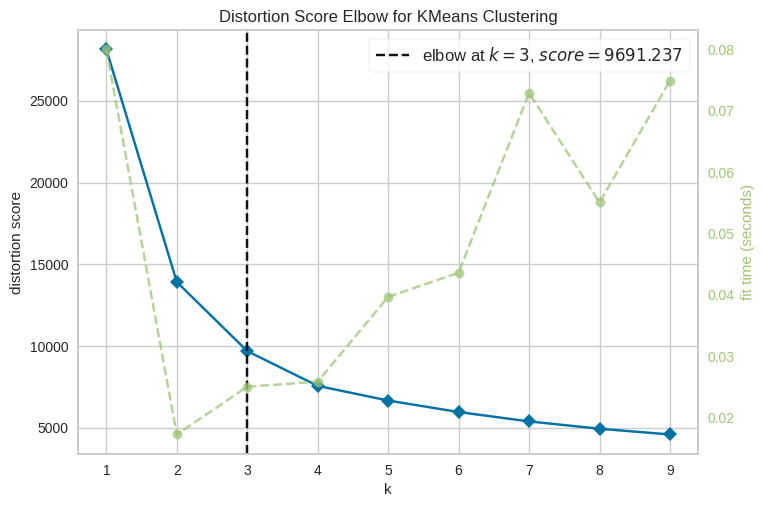

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
# Fit the data to the visualizer
v.fit(PCA_ds)
# Finalize and display the Elbow Curve
v.poof()

The above plot indicates that 3 will be an optimal number of clusters for this data. Next, we will be fitting the K-Means Clustering Algorithm to get the final clusters.

**Silhouette Score:**

Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, with higher values indicating better-defined clusters.

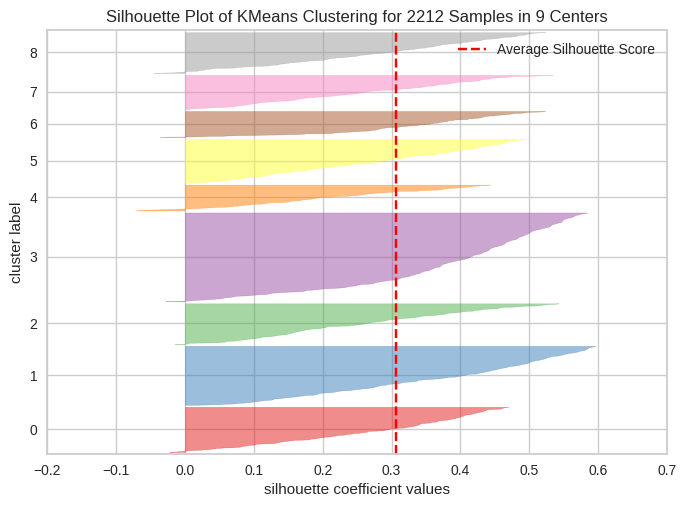

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2212 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [80]:
from yellowbrick.cluster import SilhouetteVisualizer

# Assuming m is your KMeans model
silhouette_visualizer = SilhouetteVisualizer(m, k=(2, 10))
silhouette_visualizer.fit(PCA_ds)
silhouette_visualizer.poof()

The Silhouette Score for Cluster 3 is observed to be 0.58, indicating a relatively well-defined and cohesive grouping of data points within this cluster.

In [106]:
kmeans = KMeans(n_clusters=3)
yhat_kmeans = kmeans.fit_predict(PCA_ds)
# Add the 'Clusters' column to the PCA dataset
PCA_ds['Clusters'] = yhat_kmeans
PCA_ds.head()

,PC1,PC2,PC3,Clusters
0,5.251995,-1.712825,-0.689926,2
1,1.371277,-1.917631,-0.203340,2
2,-0.647974,0.165717,-2.693222,0
3,-3.712321,0.109626,-2.058096,0
4,-2.347971,-2.157684,0.840795,0


In [92]:
from sklearn.metrics import silhouette_samples

# Assuming 'data' is your feature matrix and 'predicted_labels' are the predicted cluster labels
silhouette_values = silhouette_samples(PCA_ds.drop(['Clusters'],axis=1), yhat_kmeans)

# Get unique cluster labels
unique_clusters = np.unique(yhat_kmeans)

# Iterate over each cluster and compute the average Silhouette Score
for cluster_label in unique_clusters:
    mask = (yhat_kmeans == cluster_label)
    cluster_silhouette_values = silhouette_values[mask]

    # Print the average Silhouette Score for the current cluster
    avg_silhouette_score = np.mean(cluster_silhouette_values)
    print(f"Cluster {cluster_label}: Average Silhouette Score = {avg_silhouette_score}")

Cluster 0: Average Silhouette Score = 0.4185821322501859
Cluster 1: Average Silhouette Score = 0.31683359280543444
Cluster 2: Average Silhouette Score = 0.5085448072257439


**Inertia (Within-Cluster Sum of Squares):**

Measures the sum of squared distances from each point to its assigned cluster center. Lower inertia indicates better clustering.

In [83]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 9691.296352544301


**Davies-Bouldin Index:**

Measures the average similarity ratio of each cluster with the cluster that is most similar to it. Lower values indicate better clustering.

In [85]:
db_index = davies_bouldin_score(scaled_data, yhat_kmeans)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.8376839289151252


In [89]:
db_index = davies_bouldin_score(PCA_ds.drop(['Clusters'],axis=1), yhat_kmeans)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.9367753928338488


Observing the Davies-Bouldin Index, it is evident that the reduced data by PCA exhibits a lower value compared to the scaled data. A lower Davies-Bouldin Index score is indicative of better clustering performance. Therefore, the utilization of PCA proves beneficial for enhancing the clustering operation.

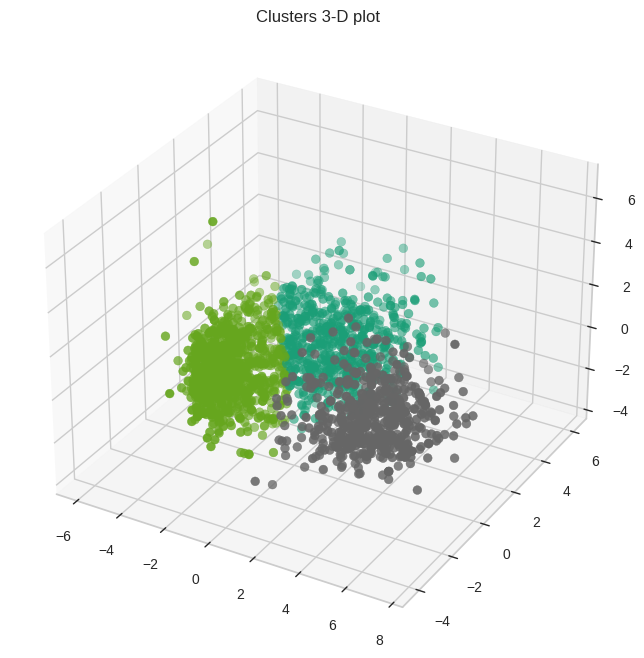

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'Dark2' )
ax.set_title("Clusters 3-D plot")
plt.show()

**2. Hierarchical Clustering**

In hierarchical clustering, two primary methods exist: Divisive and Agglomerative. Divisive, also known
as top-down clustering, starts with all observations grouped into a single cluster. This cluster is successively
divided into smaller clusters based on their dissimilarity until each observation forms its own cluster.
Contrarily, Agglomerative clustering, also called bottom-up clustering, begins with each observation as a
separate cluster. Similar clusters are progressively merged together based on their similarity until reaching
a single cluster containing all observations.
In the Agglomerative method, determining the optimal number of clusters often involves inspecting a dendrogram, a tree-like diagram illustrating the merging process and distances between clusters. The ideal
number of clusters can be inferred from the dendrogram.

* **Dendrogram Plotting using Ward’s method**




In [ ]:
#Previously we added a column to PCA_ds called "clusters"
#We should retain and delete it before passing to other clustering algos
km_clusters = PCA_ds['Clusters']
clus_del = ['Clusters']
PCA_ds = PCA_ds.drop(clus_del, axis = 1)

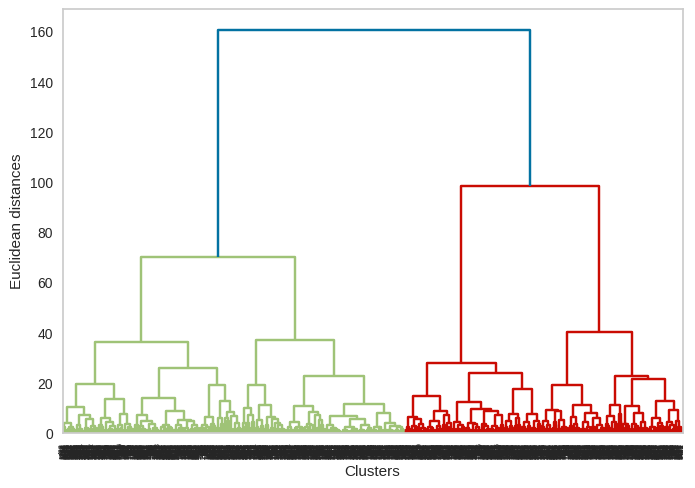

In [118]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
dendrogram = sch.dendrogram(sch.linkage(PCA_ds, method='ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.show()

We can see 2 prominent clusters here (green, red)

In [109]:
AC = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["H_clus"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["H_clus"]= yhat_AC


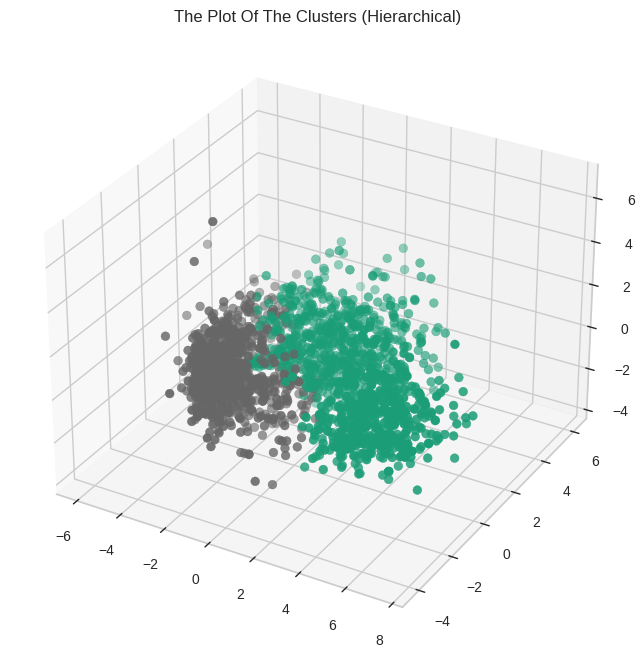

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["H_clus"], marker='o',cmap='Dark2' )
ax.set_title("The Plot Of The Clusters (Hierarchical)")
plt.show()

In [111]:
# Assuming 'data' is your feature matrix and 'predicted_labels' are the predicted cluster labels
silhouette_values = silhouette_samples(PCA_ds.drop(['H_clus'],axis=1), yhat_AC)

# Get unique cluster labels
unique_clusters = np.unique(yhat_AC)

# Iterate over each cluster and compute the average Silhouette Score
for cluster_label in unique_clusters:
    mask = (yhat_AC == cluster_label)
    cluster_silhouette_values = silhouette_values[mask]

    # Print the average Silhouette Score for the current cluster
    avg_silhouette_score = np.mean(cluster_silhouette_values)
    print(f"Cluster {cluster_label}: Average Silhouette Score = {avg_silhouette_score}")

Cluster 0: Average Silhouette Score = 0.44418705630421246
Cluster 1: Average Silhouette Score = 0.436375453206981


In [113]:
db_index = davies_bouldin_score(PCA_ds.drop(['H_clus'],axis=1), yhat_AC)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.9045643673635658


From the results above, we showed that the **K-Means algorithm** reveals three distinct clusters based
on centroid positions, while **Agglomerative Clustering** identifies two clusters by progressively merging
similar points.

**X. Interpretation**

For evaluation, and for the purpose of simplicity, we will choose only 2 clusters based on Agglomerative Clustering
algorithm results.

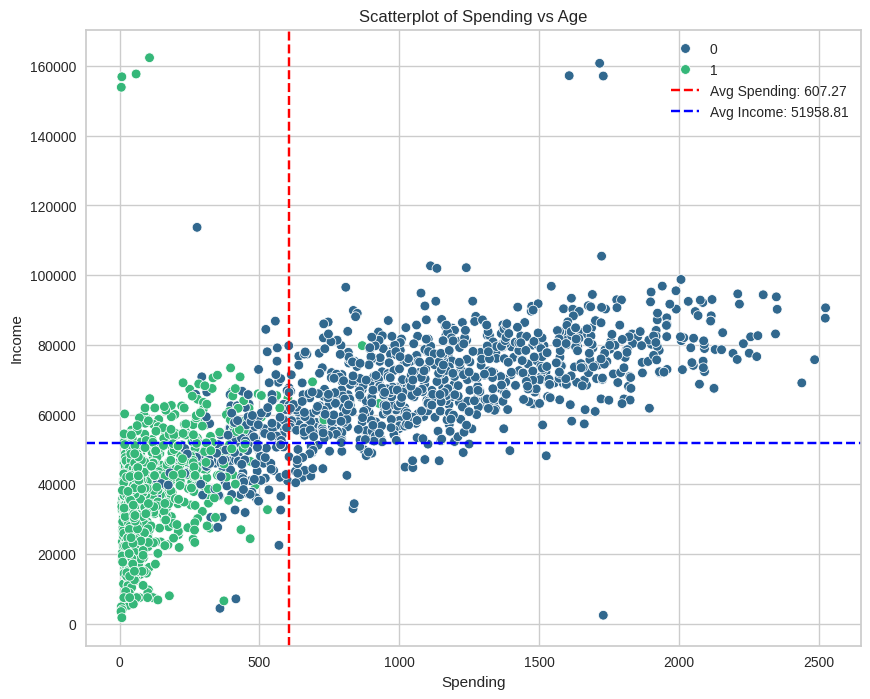

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = data,x=data["Spending"], y=data["Income"],hue=data["H_clus"], palette='viridis')
plt.title('Scatterplot of Spending vs Age')
plt.xlabel('Spending')
plt.ylabel('Income')
plt.grid(True)

avg_income = data["Income"].mean()
avg_spending = data["Spending"].mean()

plt.axvline(x=avg_spending, color='red', linestyle='--', label=f'Avg Spending: {avg_spending:.2f}')
plt.axhline(y=avg_income, color='blue', linestyle='--', label=f'Avg Income: {avg_income:.2f}')
plt.legend()
plt.show()

We can see from the plot, that the clusters are divised into two distinct groups :
* 1st group (green) : relatively has spending and income bellow their average respectively. (Low spending low income)
* 2nd group (blue) : relatively has Spending and Income above their average respectively. (high spending high income)

I’ll delve into the specific breakdown of clusters concerning product preferences within the dataset. I’ll
analyze the distribution across various product categories, such as Wines, Fruits, Meat, Fish, Sweets, and
Gold, to gain detailed insights into cluster preferences.

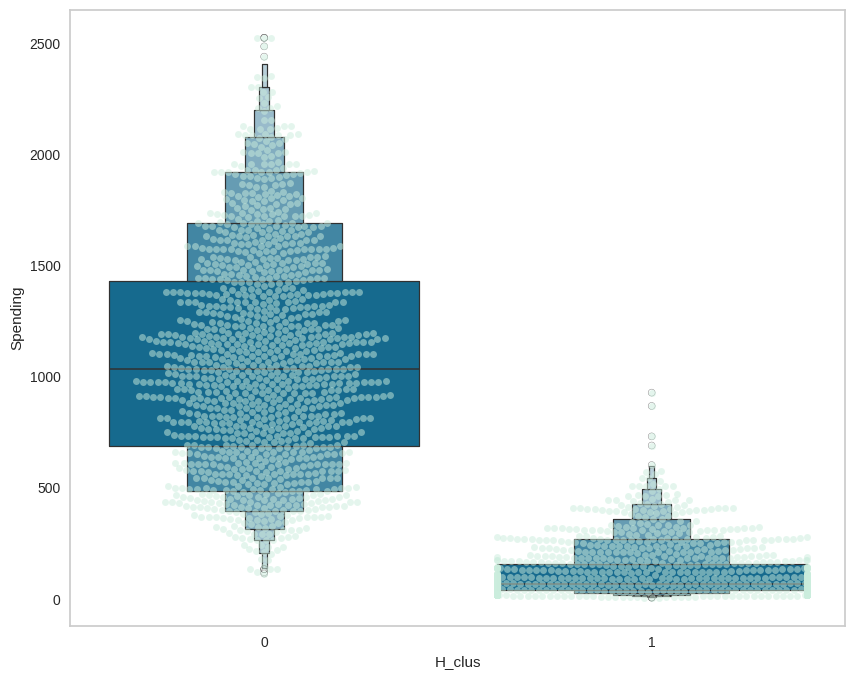

In [ ]:
plt.figure(figsize = (10,8))
pl=sns.swarmplot(x=data["H_clus"], y=data["Spending"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["H_clus"], y=data["Spending"])
plt.show()

From the above plot, it can be clearly seen that cluster 0 is our biggest set of customers closely followed by cluster 1. We can explore what each cluster is spending on for the targeted marketing strategies.

Let us next explore how did our promotions campaign do in the past.

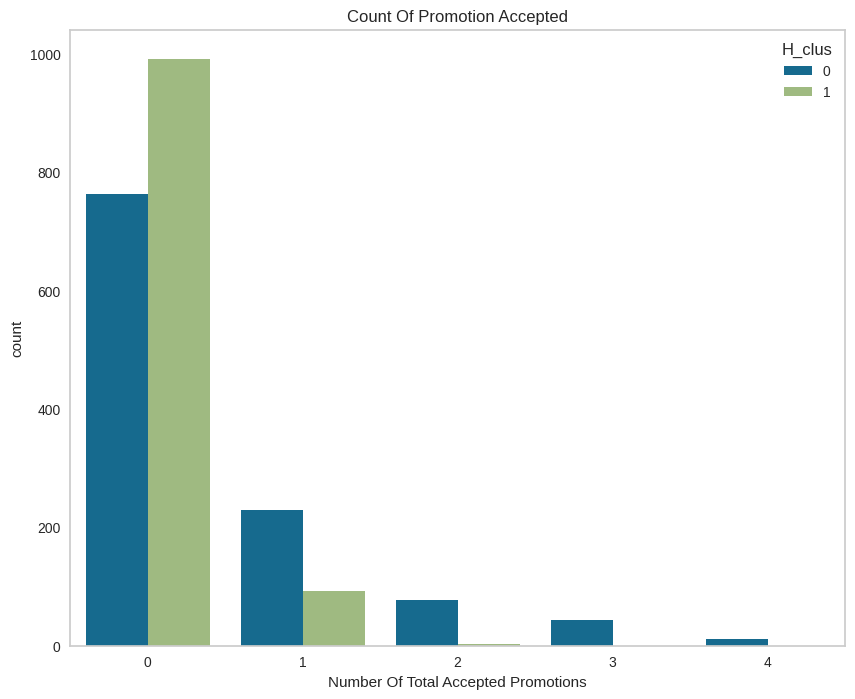

In [ ]:
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure(figsize = (10,8))
pl = sns.countplot(x=data["Total_Promos"],hue=data["H_clus"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

The analysis reveals a general declining trend in the count of accepted promotions as the number of promotions increases. However, Cluster 0 stands out by actively engaging in all promotion types, showcasing a
consistent and noteworthy response to various promotional campaigns compared to other clusters.

It is suggested that marketing campaigns should maintain cluster 0 and encourage cluster 1 in order to increase sales.

Let’s see how these clusters do with the number of deals purchased :

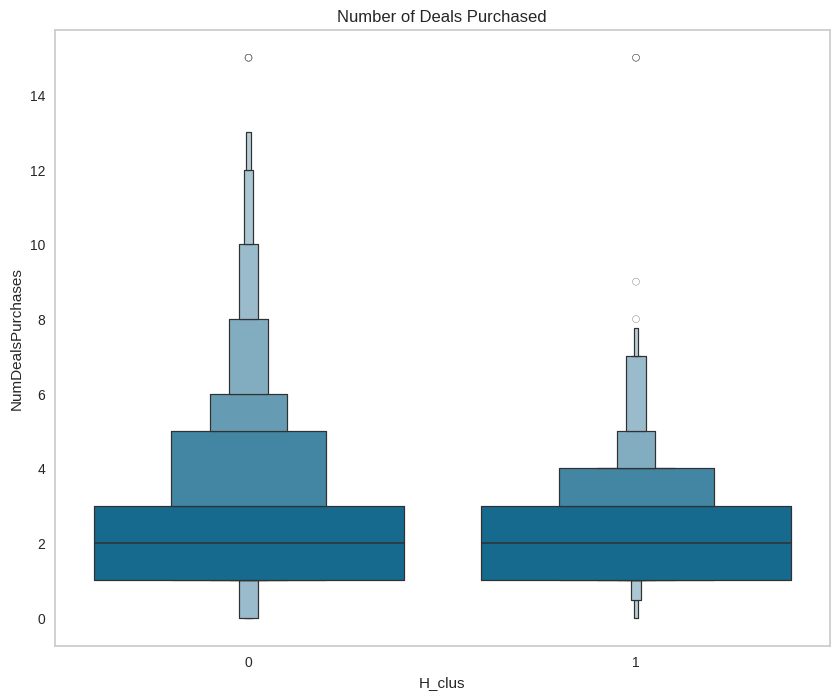

In [ ]:
plt.figure(figsize = (10, 8))
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["H_clus"])
pl.set_title("Number of Deals Purchased")
plt.show()

Clusters 0 and 1 showcase a relatively comparable distribution in terms of the number of deals purchased.
This similarity suggests that these clusters share analogous purchasing patterns concerning the acquisition
of deals. Despite potentially belonging to distinct segments, they demonstrate a resemblance in their engagement with deals, indicating overlapping behaviors in deal-based purchasing activities.

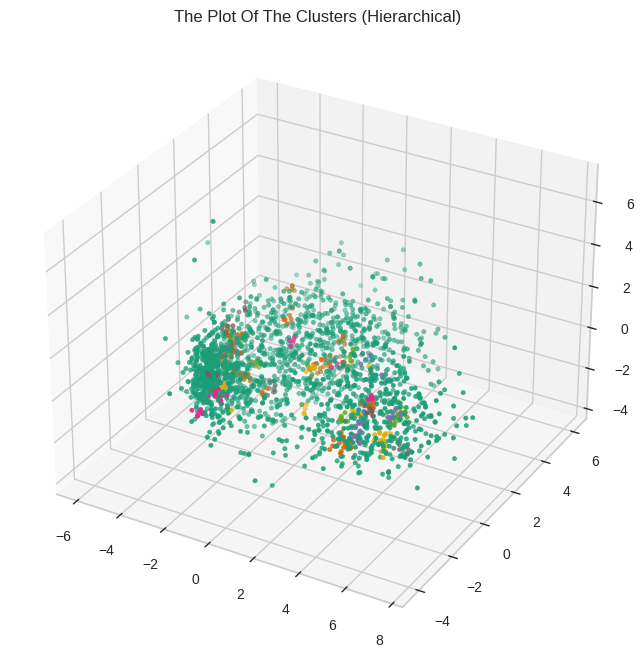

In [122]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(PCA_ds)

# Visualize the results
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=10, c=labels, marker='o',cmap='Dark2' )
ax.set_title("The Plot Of The Clusters (Hierarchical)")
plt.show()

DBSCAN is less suitable for the clustering task due to its limitations, such as sensitivity to density variations, difficulties in handling clusters of different shapes and sizes, and challenges in determining appropriate parameters like epsilon (eps) and minimum samples (min_samples).

In [34]:
labels_series = pd.Series(labels)
labels_series.value_counts()


 1     1255
-1      408
 0      354
 2       66
 5       13
 3       10
 7        9
 8        9
 15       9
 18       9
 4        8
 9        7
 11       7
 12       6
 10       5
 6        5
 17       5
 16       5
 13       5
 20       5
 14       5
 21       4
 19       3
dtype: int64

**K Prototype Clustering**

In [123]:
catg=['Education', 'Living_With', 'Country' ]

In [124]:
num=df.drop(catg, axis=1)
catgy=df[catg]

In [125]:
# Standardize numerical features
numerical_features_scaled = StandardScaler().fit_transform(num)

# Apply PCA to numerical features
pca = PCA(n_components=3)
numerical_features_pca = pca.fit_transform(numerical_features_scaled)

In [126]:
combined_features = np.concatenate((numerical_features_pca, catgy), axis=1)

In [ ]:
kproto = KPrototypes(n_clusters=3, init='Cao', n_init=1, verbose=2)
clusters = kproto.fit_predict(combined_features, categorical=catgy.values.tolist())

Can't resolve the problem to run the script

In [129]:
kproto.categorical = list(range(len(num.columns), combined_features.shape[1]))

**About the clusters 0 and 1**

**Cluster 0**

* At max has 4 members of the family and at least 1. Majority has 2 members of the family
* Have at most 2 kids.
* Most of them has 0 kidhome (most spending) and very few has 1, none has 2 kidhome.
* At most has 1 teenager at home.
* Relatively older.
* Low income

**Cluster 1**

* Definitely a parent.
* Most has 3 family members.
* Have at most 3 kids.
* Relatively younger.
* Span all ages
* High Income

**Conclusion**

In this project, I applied unsupervised clustering techniques involving dimensionality reduction, K-means, and agglomerative clustering methods. I identified two distinct customer clusters and utilized these clusters to profile customers based on their family compositions, income, and spending behaviors. These insights can significantly enhance the development of more targeted and effective marketing strategies.